# Load packages

In [203]:
import re
import json
from pathlib import Path
import pandas as pd
import numpy as np

In [204]:
!pwd

/storage/users/job37yv/Projects/Cardiomyopathy/scripts


# Data Loading

In [205]:
import pandas as pd

# Path to your Excel file (relative to your scripts folder)
file_path = "../data/raw_data/Johannes_Version-2-qc.xlsx"

# Load with header rows (the real header starts at row 3, so use header## c=2)
df_raw = pd.read_excel(file_path, sheet_name=0, header=0)

# Drop the first repeated header row
df_raw = df_raw.iloc[1:, :]

df_raw.head(40)

,Patients,"Group (1=diabetic neuropathy, 2=diabetes without neuropathy, 0=control)",diabetes type,age,sex,Duration of Disease (months),SNAP (sural nerve),HbA1c (%),NIS-LL,SAS,NPSI,IENFD(per mm),"NF155 periodicity, mean (±SD)","NF186 periodicity, mean (±SD)","Caspr1 periodicity , mean (±SD)"
1,DB28513,1,2,66.0,male,75,0,4.9,15,32.0,33.0,1.93,413.51 (±167),413.51(±167),532.12(±157)
2,DB45913,2,2,63.0,male,11,34.3,5.3,0,2.0,0.0,3.76,542.21 (±152),542.21(±152),189.21(±81)
3,DB67312,2,2,72.0,male,180,6.3,7.8,1,0.0,0.0,1.72,NaN,NaN,231.60(±92)
4,DB85312,1,2,70.0,male,18,3.1,7,13,1.0,5.0,1.06,387.41 (±160),387.41(±160),316(±145)
5,DB6213,2,2,54.0,male,144,13.4,7.1,0,12.0,0.0,3.38,226.49 (±58),226.49 (±58),299.43(±135)
6,DB10613,1,2,69.0,male,11,2,9.8,5,10.0,12.0,0.25,311.98587 (±107),311.98587 (±107),331.21(±136)
7,DB82112,1,2,61.0,male,1,6.5,6.8,2,2.0,0.0,1.21,275.00(±100),275.00(±100),314.86 (±156)
8,DB553/13,1,2,73.0,male,180,2.8,6.8,3,17.0,0.0,2.67,420.90 (±225),420.90 (±225),331.44 (±156)
9,DB1034/13,1,2,55.0,male,0,4,"6,1",23,17.0,34.0,0,600,600,600
10,DB1091/13,1,1,54.0,male,252,8.6,7.1,25,28.0,49.0,6.52,456(±153),456(±153),511.12(±147)


# Data cleaning

In [206]:
# --- Keep a pristine copy for comparison if you want to sanity-check later ---
df = df_raw.copy()


# --- Normalize headers (no semantic change) ---
def _norm(s: str) -> str:
    s = str(s)
    s = re.sub(r"\s+", " ", s).strip()
    s = re.sub(r"\s+,", ",", s)
    return s

df.columns = [_norm(c) for c in df.columns]

# --- Rename (short names) ---
df = df.rename(columns={
    "Patients": "patient_id",
    "Group (1=diabetic neuropathy, 2=diabetes without neuropathy, 0=control)": "group",
    "diabetes type": "diabetes_type",
    "age": "age",
    "sex": "sex",
    "Duration of Disease (months)": "duration_months",
    "SNAP (sural nerve)": "snap_sural_nerve",
    "HbA1c (%)": "hba1c_pct",
    "NIS-LL": "nis_ll",
    "SAS": "sas",
    "NPSI": "npsi",
    "IENFD(per mm)": "ienfd_per_mm",
    "NF155 periodicity, mean (±SD)": "nf155_mean_nm",
    "NF186 periodicity, mean (±SD)": "nf186_mean_nm",
    "Caspr1 periodicity, mean (±SD)": "caspr1_mean_nm",
})


df.head(40)

,patient_id,group,diabetes_type,age,sex,duration_months,snap_sural_nerve,hba1c_pct,nis_ll,sas,npsi,ienfd_per_mm,nf155_mean_nm,nf186_mean_nm,caspr1_mean_nm
1,DB28513,1,2,66.0,male,75,0,4.9,15,32.0,33.0,1.93,413.51 (±167),413.51(±167),532.12(±157)
2,DB45913,2,2,63.0,male,11,34.3,5.3,0,2.0,0.0,3.76,542.21 (±152),542.21(±152),189.21(±81)
3,DB67312,2,2,72.0,male,180,6.3,7.8,1,0.0,0.0,1.72,NaN,NaN,231.60(±92)
4,DB85312,1,2,70.0,male,18,3.1,7,13,1.0,5.0,1.06,387.41 (±160),387.41(±160),316(±145)
5,DB6213,2,2,54.0,male,144,13.4,7.1,0,12.0,0.0,3.38,226.49 (±58),226.49 (±58),299.43(±135)
6,DB10613,1,2,69.0,male,11,2,9.8,5,10.0,12.0,0.25,311.98587 (±107),311.98587 (±107),331.21(±136)
7,DB82112,1,2,61.0,male,1,6.5,6.8,2,2.0,0.0,1.21,275.00(±100),275.00(±100),314.86 (±156)
8,DB553/13,1,2,73.0,male,180,2.8,6.8,3,17.0,0.0,2.67,420.90 (±225),420.90 (±225),331.44 (±156)
9,DB1034/13,1,2,55.0,male,0,4,"6,1",23,17.0,34.0,0,600,600,600
10,DB1091/13,1,1,54.0,male,252,8.6,7.1,25,28.0,49.0,6.52,456(±153),456(±153),511.12(±147)


In [207]:

# --- Columns you want to be numeric (edit if needed) ---
numeric_cols = [
    "group","diabetes_type","age","duration_months","snap_sural_nerve","hba1c_pct",
    "nis_ll","sas","npsi","ienfd_per_mm",
    "nf155_mean_nm","nf186_mean_nm","caspr1_mean_nm"
]

# --- Robust "keep the first number, drop the rest" parser ---
_num_re = re.compile(r'[-+]?\d*\.?\d+(?:[eE][-+]?\d+)?')  # first numeric token

def extract_mean(x):
    if pd.isna(x):
        return np.nan
    s = str(x).strip().replace(",", ".")  # handle European decimals
    m = _num_re.search(s)
    return float(m.group(0)) if m else np.nan

# --- Convert IN PLACE (no filling, NaN stays NaN) ---
for c in numeric_cols:
    if c in df.columns:
        df[c] = df[c].apply(extract_mean).astype(float)

# (Optional) if you want to *preserve* the raw text and write numeric to *_num instead:
# for c in numeric_cols:
#     if c in df.columns:
#         df[c + "_num"] = df[c].apply(extract_mean).astype(float)

# Quick sanity check
print(df[numeric_cols].dtypes)
print(df.loc[:, ["nf155_mean_nm","nf186_mean_nm","caspr1_mean_nm"]].head(10))

df.head(40)

group               float64
diabetes_type       float64
age                 float64
duration_months     float64
snap_sural_nerve    float64
hba1c_pct           float64
nis_ll              float64
sas                 float64
npsi                float64
ienfd_per_mm        float64
nf155_mean_nm       float64
nf186_mean_nm       float64
caspr1_mean_nm      float64
dtype: object
    nf155_mean_nm  nf186_mean_nm  caspr1_mean_nm
1       413.51000      413.51000          532.12
2       542.21000      542.21000          189.21
3             NaN            NaN          231.60
4       387.41000      387.41000          316.00
5       226.49000      226.49000          299.43
6       311.98587      311.98587          331.21
7       275.00000      275.00000          314.86
8       420.90000      420.90000          331.44
9       600.00000      600.00000          600.00
10      456.00000      456.00000          511.12


,patient_id,group,diabetes_type,age,sex,duration_months,snap_sural_nerve,hba1c_pct,nis_ll,sas,npsi,ienfd_per_mm,nf155_mean_nm,nf186_mean_nm,caspr1_mean_nm
1,DB28513,1.0,2.0,66.0,male,75.0,0.00,4.9,15.0,32.0,33.0,1.93,413.51000,413.51000,532.12
2,DB45913,2.0,2.0,63.0,male,11.0,34.30,5.3,0.0,2.0,0.0,3.76,542.21000,542.21000,189.21
3,DB67312,2.0,2.0,72.0,male,180.0,6.30,7.8,1.0,0.0,0.0,1.72,NaN,NaN,231.60
4,DB85312,1.0,2.0,70.0,male,18.0,3.10,7.0,13.0,1.0,5.0,1.06,387.41000,387.41000,316.00
5,DB6213,2.0,2.0,54.0,male,144.0,13.40,7.1,0.0,12.0,0.0,3.38,226.49000,226.49000,299.43
6,DB10613,1.0,2.0,69.0,male,11.0,2.00,9.8,5.0,10.0,12.0,0.25,311.98587,311.98587,331.21
7,DB82112,1.0,2.0,61.0,male,1.0,6.50,6.8,2.0,2.0,0.0,1.21,275.00000,275.00000,314.86
8,DB553/13,1.0,2.0,73.0,male,180.0,2.80,6.8,3.0,17.0,0.0,2.67,420.90000,420.90000,331.44
9,DB1034/13,1.0,2.0,55.0,male,0.0,4.00,6.1,23.0,17.0,34.0,0.00,600.00000,600.00000,600.00
10,DB1091/13,1.0,1.0,54.0,male,252.0,8.60,7.1,25.0,28.0,49.0,6.52,456.00000,456.00000,511.12


# remove columns with to mcuh NaN

In [208]:
# columns you want to exclude from analysis
EXCLUDE = ["age","sex","sex_bin","snap_sural_nerve","hba1c_pct","nis_ll","sas","npsi"]

# keep the original df untouched; use df_use for all downstream analysis
df_use = df.drop(columns=EXCLUDE, errors="ignore").copy()

print("Columns kept for analysis:", list(df_use.columns))
print("Dropped:", [c for c in EXCLUDE if c in df.columns])

Columns kept for analysis: ['patient_id', 'group', 'diabetes_type', 'duration_months', 'ienfd_per_mm', 'nf155_mean_nm', 'nf186_mean_nm', 'caspr1_mean_nm']
Dropped: ['age', 'sex', 'snap_sural_nerve', 'hba1c_pct', 'nis_ll', 'sas', 'npsi']


In [209]:
df_use.head(40)

,patient_id,group,diabetes_type,duration_months,ienfd_per_mm,nf155_mean_nm,nf186_mean_nm,caspr1_mean_nm
1,DB28513,1.0,2.0,75.0,1.93,413.51000,413.51000,532.12
2,DB45913,2.0,2.0,11.0,3.76,542.21000,542.21000,189.21
3,DB67312,2.0,2.0,180.0,1.72,NaN,NaN,231.60
4,DB85312,1.0,2.0,18.0,1.06,387.41000,387.41000,316.00
5,DB6213,2.0,2.0,144.0,3.38,226.49000,226.49000,299.43
6,DB10613,1.0,2.0,11.0,0.25,311.98587,311.98587,331.21
7,DB82112,1.0,2.0,1.0,1.21,275.00000,275.00000,314.86
8,DB553/13,1.0,2.0,180.0,2.67,420.90000,420.90000,331.44
9,DB1034/13,1.0,2.0,0.0,0.00,600.00000,600.00000,600.00
10,DB1091/13,1.0,1.0,252.0,6.52,456.00000,456.00000,511.12


In [210]:
# 

In [211]:
# ============================================
# NaN-aware diagnostics: Healthy vs patient tasks
# ============================================
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import LeaveOneOut, cross_val_predict
from sklearn.tree import DecisionTreeClassifier, export_text

# ---------- config ----------
OUT = "../analysis/group-diagnostics"
FIGDIR = f"{OUT}/figs"
os.makedirs(FIGDIR, exist_ok=True)

# your available columns in df_use:
# ['patient_id','group','diabetes_type','duration_months','ienfd_per_mm',
#  'nf155_mean_nm','nf186_mean_nm','caspr1_mean_nm']

FEATURES = ["duration_months","ienfd_per_mm","nf155_mean_nm","nf186_mean_nm","caspr1_mean_nm"]
MIN_SAMPLES = 8
B = 2000
RNG = np.random.default_rng(42)

# 0=control, 1=DM+neuropathy, 2=DM-no-neuropathy
def make_task(task, s):
    s = pd.to_numeric(s, errors="coerce")
    if task == "A_anyDM_vs_control":        # (1 or 2) vs 0
        return s.map({0:0,1:1,2:1})
    if task == "B_neuropathy_vs_others":    # 1 vs (0 or 2)
        return s.map({1:1,0:0,2:0})
    if task == "C_neuropathy_vs_DMonly":    # 1 vs 2 (drop 0)
        return s.replace({0:np.nan}).map({1:1,2:0})
    raise ValueError

TASKS = ["A_anyDM_vs_control","B_neuropathy_vs_others","C_neuropathy_vs_DMonly"]

# ---------- helpers (NaN-aware, per-comparison masks) ----------
def best_orientation(x, y):
    x = np.asarray(x, float); y = np.asarray(y, int)
    m = ~np.isnan(x) & ~np.isnan(y)
    x = x[m]; y = y[m]
    if np.unique(y).size < 2:
        return x, y, ">="
    auc = roc_auc_score(y, x)
    return (x, y, ">=") if auc >= 0.5 else (-x, y, "<=")

def youden(y, s):
    fpr, tpr, thr = roc_curve(y, s)
    j = tpr - fpr
    i = int(np.nanargmax(j))
    return float(thr[i]), float(tpr[i]), float(1 - fpr[i])

def boot_auc(y, s, B=2000, rng=None):
    rng = RNG if rng is None else rng
    m = ~np.isnan(y) & ~np.isnan(s)
    y = y[m].astype(int); s = s[m].astype(float)
    if y.nunique() < 2: return np.nan, (np.nan, np.nan)
    ip = np.where(y==1)[0]; ineg = np.where(y==0)[0]
    aucs = []
    for _ in range(B):
        bp = rng.choice(ip, len(ip), True)
        bn = rng.choice(ineg, len(ineg), True)
        yb = np.r_[np.ones(len(ip)), np.zeros(len(ineg))]
        sb = np.r_[s[bp], s[bn]]
        aucs.append(roc_auc_score(yb, sb))
    aucs = np.asarray(aucs)
    return float(np.nanmedian(aucs)), (float(np.nanpercentile(aucs,2.5)),
                                       float(np.nanpercentile(aucs,97.5)))

def mwu_auc(x0, x1):
    x0 = x0[~np.isnan(x0)]; x1 = x1[~np.isnan(x1)]
    if len(x0)==0 or len(x1)==0: return np.nan, np.nan
    U, p = mannwhitneyu(x1, x0, alternative="two-sided")
    auc = U / (len(x0)*len(x1))
    return float(p), float(auc)


def leak_flags(x, y, q=5):
    """
    Flag (a) perfect separation and (b) near-separation via non-overlap of the
    central (100-2*q)% intervals (default 90% with q=5) for classes y∈{0,1}.
    Works with NumPy or pandas, ignores NaN/±inf.
    """
    x = np.asarray(x, dtype=float).ravel()
    y = np.asarray(y).ravel()

    # mask bad/missing
    m = np.isfinite(x) & (~pd.isna(y))
    x = x[m]
    y = y[m].astype(int)

    # both classes present?
    if np.unique(y).size < 2:
        return False, False

    x0 = x[y == 0]
    x1 = x[y == 1]
    if len(x0) == 0 or len(x1) == 0:
        return False, False

    # perfect separation: non-overlapping ranges
    perfect = (np.nanmax(x0) < np.nanmin(x1)) or (np.nanmax(x1) < np.nanmin(x0))

    # near separation: non-overlap of central (100-2*q)% intervals
    lo0, hi0 = np.nanpercentile(x0, [q, 100 - q])
    lo1, hi1 = np.nanpercentile(x1, [q, 100 - q])
    near = (hi0 < lo1) or (hi1 < lo0)

    return bool(perfect), bool(near)


In [212]:
# ---------- 0) availability snapshot (per feature & task) ----------
avail_rows = []
for t in TASKS:
    y = make_task(t, df_use["group"])             # Series aligned to df_use index
    for f in FEATURES:
        m = (~df_use[f].isna()) & (~y.isna())     # boolean mask
        n = int(m.sum())                          # ✅ cast after sum
        avail_rows.append({"task": t, "feature": f, "n_usable": n})

avail = pd.DataFrame(avail_rows)
print("Availability by task/feature (usable n after NaN masking):")
display(avail.pivot(index="feature", columns="task", values="n_usable"))

Availability by task/feature (usable n after NaN masking):


task,A_anyDM_vs_control,B_neuropathy_vs_others,C_neuropathy_vs_DMonly
feature,,,
caspr1_mean_nm,33,33,21
duration_months,36,36,22
ienfd_per_mm,27,27,22
nf155_mean_nm,31,31,18
nf186_mean_nm,31,31,18


In [213]:
# ---------- 1) Univariate diagnostics (strict per-feature masks) ----------
rows = []
for t in TASKS:
    y = make_task(t, df_use["group"])
    for f in FEATURES:
        m = (~df_use[f].isna()) & (~y.isna())
        if m.sum() < MIN_SAMPLES: continue
        x = df_use.loc[m, f].astype(float).values
        yy = y.loc[m].astype(int).values
        # MWU/AUC (rank)
        x0 = x[yy==0]; x1 = x[yy==1]
        p_mwu, auc_mwu = mwu_auc(x0, x1)
        # orientation + Youden + bootstrap
        s, yy2, direction = best_orientation(x, yy)
        cut, sens, spec = youden(yy2, s)
        auc_med, (auc_lo, auc_hi) = boot_auc(pd.Series(yy2), pd.Series(s), B=B, rng=RNG)
        # leaks
        perfect, near = leak_flags(x, yy)
        rows.append(dict(task=t, feature=f, n=int(m.sum()),
                         MWU_p=p_mwu, MWU_AUC=auc_mwu,
                         AUC_boot=auc_med, AUC_lo=auc_lo, AUC_hi=auc_hi,
                         cut_youden=cut, rule_dir=direction,
                         sens_at_cut=sens, spec_at_cut=spec,
                         perfect_sep=perfect, near_sep_5_95=near))
univ = pd.DataFrame(rows).sort_values(["task","AUC_boot","MWU_AUC"], ascending=[True,False,False]).reset_index(drop=True)
os.makedirs(OUT, exist_ok=True)
univ.to_csv(f"{OUT}/univariate_by_task.csv", index=False)
print("\nTop univariates per task:")
display(univ.groupby("task").head(5))


Top univariates per task:


,task,feature,n,MWU_p,MWU_AUC,AUC_boot,AUC_lo,AUC_hi,cut_youden,rule_dir,sens_at_cut,spec_at_cut,perfect_sep,near_sep_5_95
0,A_anyDM_vs_control,nf155_mean_nm,31,4.528627e-06,0.991453,0.995726,0.961538,1.000000,253.19,>=,0.944444,1.000000,False,True
1,A_anyDM_vs_control,nf186_mean_nm,31,4.528627e-06,0.991453,0.995726,0.961538,1.000000,253.19,>=,0.944444,1.000000,False,True
2,A_anyDM_vs_control,duration_months,36,7.955434e-07,0.977273,0.977273,0.931818,1.000000,1.00,>=,0.954545,1.000000,False,True
3,A_anyDM_vs_control,caspr1_mean_nm,33,3.522727e-05,0.940476,0.944444,0.833333,1.000000,278.06,>=,0.857143,1.000000,False,False
4,A_anyDM_vs_control,ienfd_per_mm,27,6.552855e-02,0.227273,0.781818,0.545455,0.954545,-2.67,<=,0.500000,1.000000,False,False
5,B_neuropathy_vs_others,nf155_mean_nm,31,2.479100e-04,0.893162,0.897436,0.743590,1.000000,275.00,>=,1.000000,0.833333,False,False
6,B_neuropathy_vs_others,nf186_mean_nm,31,2.479100e-04,0.893162,0.897436,0.743590,1.000000,275.00,>=,1.000000,0.833333,False,False
7,B_neuropathy_vs_others,caspr1_mean_nm,33,2.169067e-04,0.883459,0.887218,0.748120,0.984962,278.06,>=,0.928571,0.736842,False,False
8,B_neuropathy_vs_others,duration_months,36,3.949934e-03,0.776190,0.777778,0.604722,0.919087,1.00,>=,0.933333,0.666667,False,False
9,B_neuropathy_vs_others,ienfd_per_mm,27,2.044299e-02,0.233333,0.772222,0.555556,0.927778,-2.67,<=,0.666667,0.916667,False,False


In [214]:
# ---------- 2) Boxplot+ROC for the best few (per task), NaN-aware ----------
def plot_box_roc(df_, feat, y_bin, cut, direction, out_prefix):
    m = (~df_[feat].isna()) & (~y_bin.isna())
    x = df_.loc[m, feat].astype(float).values
    y = y_bin.loc[m].astype(int).values
    if np.unique(y).size < 2: return
    s, yy, _ = best_orientation(x, y)
    auc = roc_auc_score(yy, s)
    fpr, tpr, thr = roc_curve(yy, s)

    # box
    plt.figure(figsize=(5,4))
    plt.boxplot([x[y==0], x[y==1]], labels=["0","1"])
    if np.isfinite(cut):
        plt.axhline(cut, ls="--")
    op = ">=" if direction==">=" else "<="
    plt.title(f"{feat} | rule: {feat} {op} {cut:.3g}")
    plt.tight_layout(); plt.savefig(f"{out_prefix}_box.png", dpi=300); plt.close()

    # roc
    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr, lw=2)
    plt.plot([0,1],[0,1],"--")
    plt.title(f"ROC {feat} | AUC={auc:.3f}")
    plt.xlabel("FPR"); plt.ylabel("TPR")
    plt.tight_layout(); plt.savefig(f"{out_prefix}_roc.png", dpi=300); plt.close()

for t in TASKS:
    y = make_task(t, df_use["group"])
    top = univ[univ["task"]==t].sort_values("AUC_boot", ascending=False).head(3)
    for _, r in top.iterrows():
        plot_box_roc(df_use, r["feature"], y, r["cut_youden"], r["rule_dir"], f"{FIGDIR}/{t}_{r['feature']}")




/tmp/ipykernel_837230/775737758.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([x[y==0], x[y==1]], labels=["0","1"])
/tmp/ipykernel_837230/775737758.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([x[y==0], x[y==1]], labels=["0","1"])
/tmp/ipykernel_837230/775737758.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([x[y==0], x[y==1]], labels=["0","1"])
/tmp/ipykernel_837230/775737758.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplo

/tmp/ipykernel_837230/2384163317.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot([x[y==0], x[y==1]], labels=["0","1"])


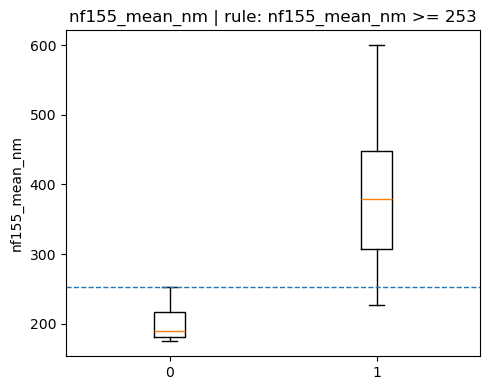

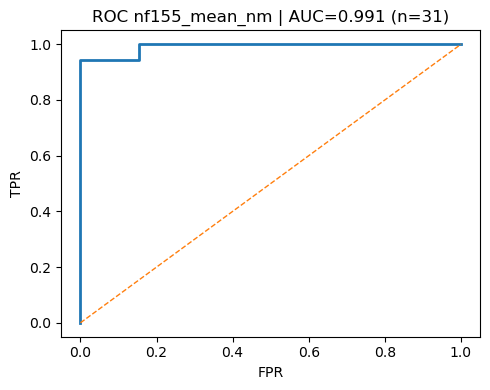

/tmp/ipykernel_837230/2384163317.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot([x[y==0], x[y==1]], labels=["0","1"])


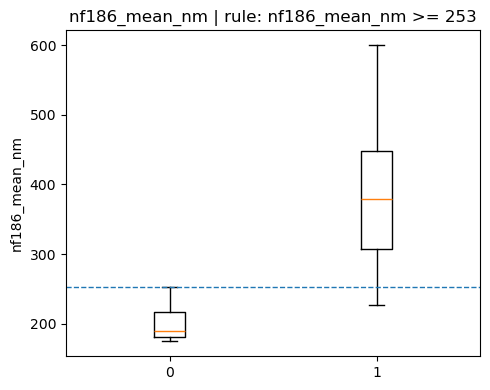

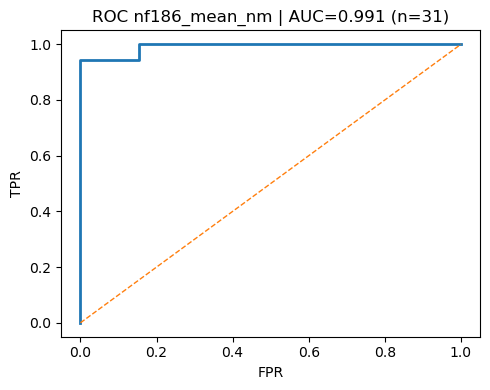

/tmp/ipykernel_837230/2384163317.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot([x[y==0], x[y==1]], labels=["0","1"])


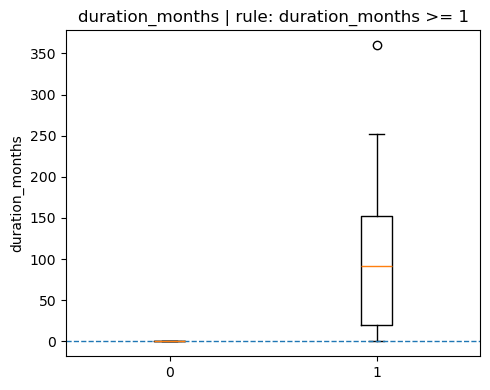

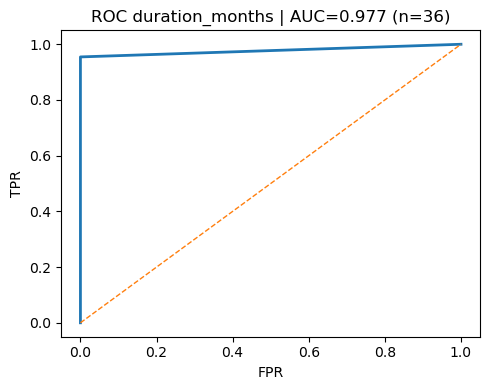

/tmp/ipykernel_837230/2384163317.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot([x[y==0], x[y==1]], labels=["0","1"])


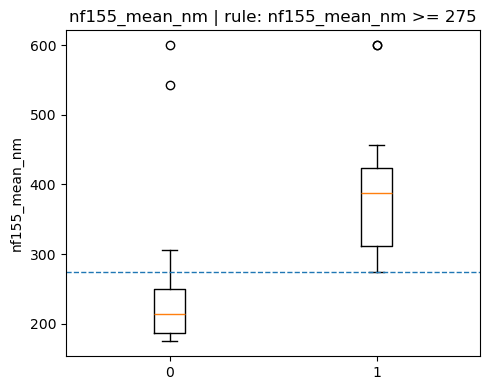

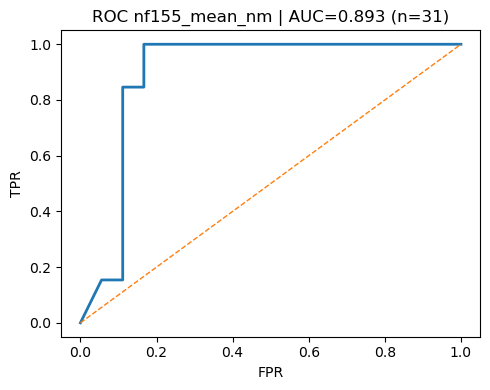

/tmp/ipykernel_837230/2384163317.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot([x[y==0], x[y==1]], labels=["0","1"])


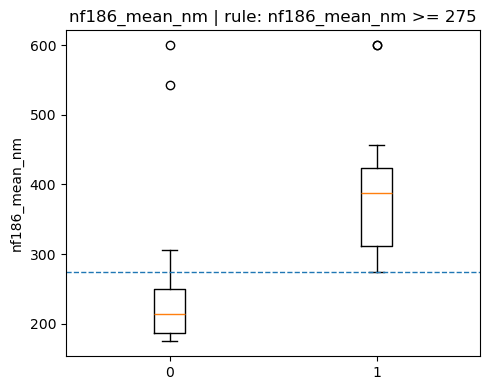

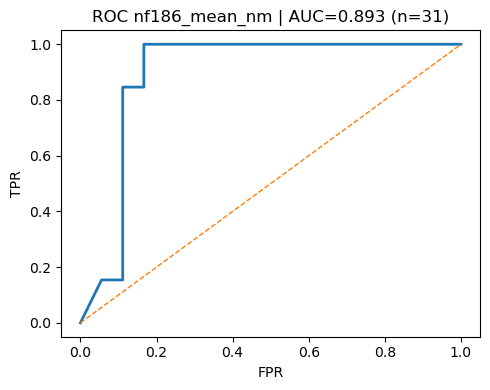

/tmp/ipykernel_837230/2384163317.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot([x[y==0], x[y==1]], labels=["0","1"])


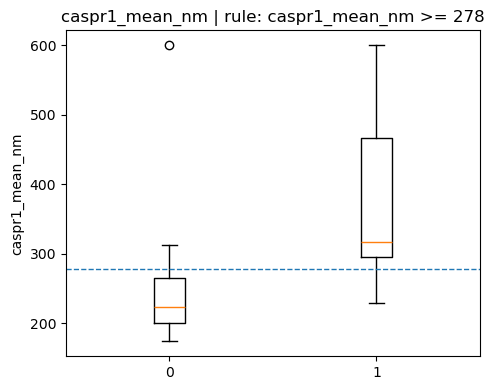

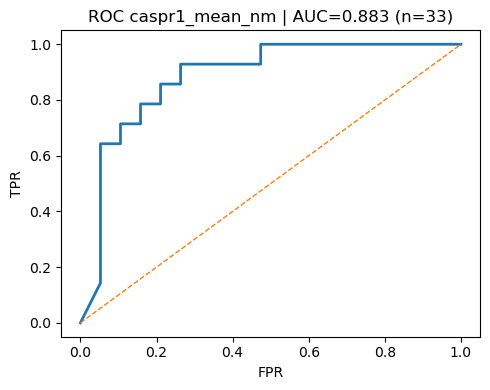

/tmp/ipykernel_837230/2384163317.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot([x[y==0], x[y==1]], labels=["0","1"])


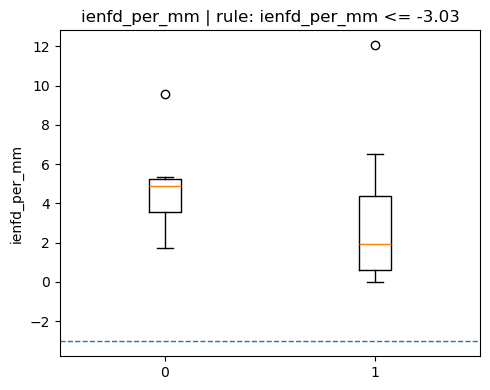

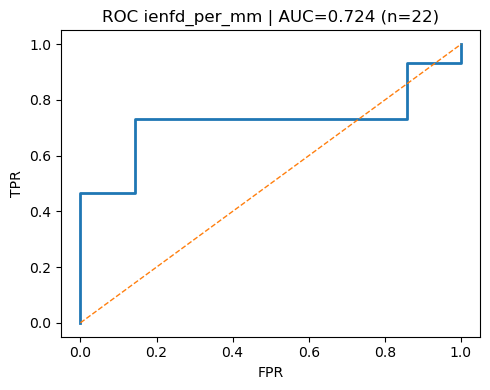

/tmp/ipykernel_837230/2384163317.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot([x[y==0], x[y==1]], labels=["0","1"])


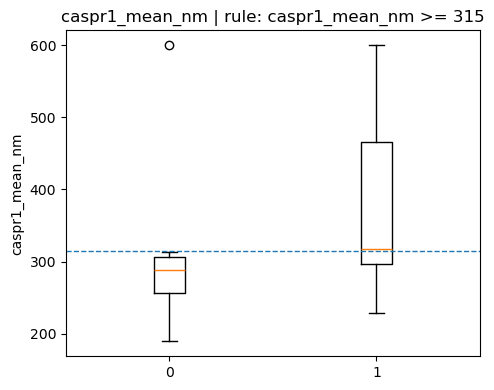

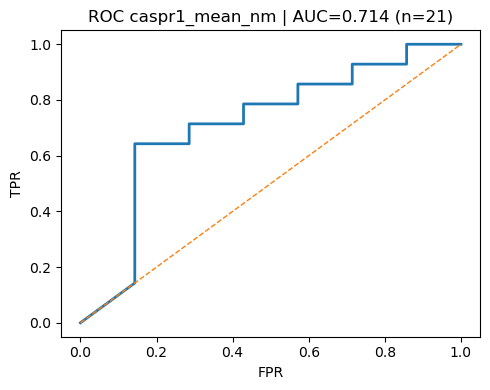

/tmp/ipykernel_837230/2384163317.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot([x[y==0], x[y==1]], labels=["0","1"])


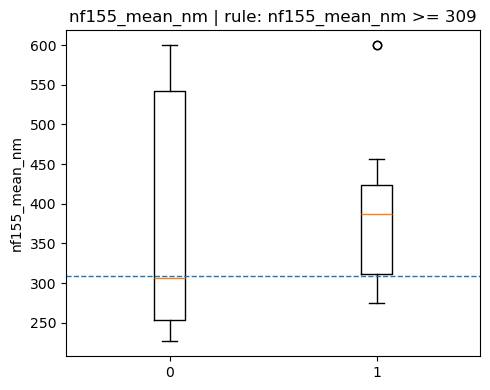

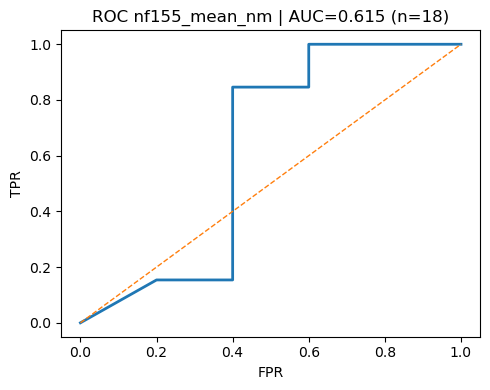

In [215]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# ---------- 2) Boxplot + ROC, show inline AND save ----------
def plot_box_roc(df_, feat, y_bin, cut, direction, out_prefix=None, show=True):
    m = (~df_[feat].isna()) & (~y_bin.isna())
    if m.sum() < 3:
        return  # too few points

    x = df_.loc[m, feat].astype(float).values
    y = y_bin.loc[m].astype(int).values
    if np.unique(y).size < 2:
        return  # only one class

    # best_orientation should return (score, y_aligned, flipped_flag_or_meta)
    s, yy, _ = best_orientation(x, y)
    auc = roc_auc_score(yy, s)
    fpr, tpr, thr = roc_curve(yy, s)

    # ----- Boxplot -----
    fig1, ax1 = plt.subplots(figsize=(5,4))
    ax1.boxplot([x[y==0], x[y==1]], labels=["0","1"])
    if np.isfinite(cut):
        ax1.axhline(cut, ls="--", lw=1)
        op = ">=" if direction == ">=" else "<="
        ax1.set_title(f"{feat} | rule: {feat} {op} {cut:.3g}")
    else:
        ax1.set_title(f"{feat} (no cutoff)")
    ax1.set_ylabel(feat)
    fig1.tight_layout()
    if out_prefix:
        fig1.savefig(f"{out_prefix}_box.png", dpi=300)
    if show:
        plt.show()
    plt.close(fig1)

    # ----- ROC -----
    fig2, ax2 = plt.subplots(figsize=(5,4))
    ax2.plot(fpr, tpr, lw=2)
    ax2.plot([0,1],[0,1], "--", lw=1)
    ax2.set_title(f"ROC {feat} | AUC={auc:.3f} (n={len(yy)})")
    ax2.set_xlabel("FPR"); ax2.set_ylabel("TPR")
    fig2.tight_layout()
    if out_prefix:
        fig2.savefig(f"{out_prefix}_roc.png", dpi=300)
    if show:
        plt.show()
    plt.close(fig2)

# Example usage for your “top 3 per task”
for t in TASKS:
    y = make_task(t, df_use["group"])
    top = univ[univ["task"]==t].sort_values("AUC_boot", ascending=False).head(3)
    for _, r in top.iterrows():
        plot_box_roc(
            df_use,
            feat=r["feature"],
            y_bin=y,
            cut=r["cut_youden"],
            direction=r["rule_dir"],
            out_prefix=f"{FIGDIR}/{t}_{r['feature']}",
            show=True,      # <-- displays in notebook
        )


In [216]:
# ---------- 3) Clean “Healthy vs Any DM” summary table with cutoffs ----------
def fmt_auc(a, lo, hi):
    return "NA" if not np.isfinite(a) else f"{a:.2f} [{lo:.2f}–{hi:.2f}]"

tabA = (univ[univ["task"]=="A_anyDM_vs_control"]
        .sort_values("AUC_boot", ascending=False)
        .loc[:, ["feature","n","AUC_boot","AUC_lo","AUC_hi","cut_youden","rule_dir","sens_at_cut","spec_at_cut","perfect_sep","near_sep_5_95"]])

nice = []
for _, r in tabA.iterrows():
    nice.append({
        "Feature": r["feature"],
        "n used": int(r["n"]),
        "AUC [95% CI]": fmt_auc(r["AUC_boot"], r["AUC_lo"], r["AUC_hi"]),
        "Youden cutoff": f"{r['rule_dir']} {r['cut_youden']:.3g}" if np.isfinite(r["cut_youden"]) else "NA",
        "Sensitivity": f"{r['sens_at_cut']:.2f}" if np.isfinite(r["sens_at_cut"]) else "NA",
        "Specificity": f"{r['spec_at_cut']:.2f}" if np.isfinite(r["spec_at_cut"]) else "NA",
        "Leak flag": "P" if r["perfect_sep"] else ("Near" if r["near_sep_5_95"] else "")
    })
summaryA = pd.DataFrame(nice)
display(summaryA)
summaryA.to_csv(f"{OUT}/A_anyDM_vs_control_cutoffs.csv", index=False)



,Feature,n used,AUC [95% CI],Youden cutoff,Sensitivity,Specificity,Leak flag
0,nf155_mean_nm,31,1.00 [0.96–1.00],>= 253,0.94,1.00,Near
1,nf186_mean_nm,31,1.00 [0.96–1.00],>= 253,0.94,1.00,Near
2,duration_months,36,0.98 [0.93–1.00],>= 1,0.95,1.00,Near
3,caspr1_mean_nm,33,0.94 [0.83–1.00],>= 278,0.86,1.00,
4,ienfd_per_mm,27,0.78 [0.55–0.95],<= -2.67,0.50,1.00,


In [ ]:
# ---------- 4) Tiny decision tree (depth<=2), NaN-wise intersection mask ----------
def tiny_tree(task, feats, max_depth=2, min_leaf=3):
    y = make_task(task, df_use["group"])
    m = y.notna()
    for f in feats: m &= df_use[f].notna()
    if m.sum() < MIN_SAMPLES or y[m].nunique() < 2:
        print(f"[{task}] Not enough data for feats={feats} (n={int(m.sum())})"); return
    X = df_use.loc[m, feats].astype(float).values
    yy = y.loc[m].astype(int).values
    clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_leaf, random_state=42)
    # LOOCV prediction **only on rows that have all feats**:
    y_prob = cross_val_predict(clf, X, yy, cv=LeaveOneOut(), method="predict_proba")[:,1]
    y_pred = (y_prob >= 0.5).astype(int)
    auc = roc_auc_score(yy, y_prob)
    cm = confusion_matrix(yy, y_pred)
    clf.fit(X, yy)
    print(f"\n=== Tiny tree {task} | feats={feats} | n={len(yy)} | LOOCV AUC={auc:.3f}")
    print("CM (rows=true, cols=pred):\n", cm)
    print(export_text(clf, feature_names=feats, decimals=3))

# choose the top-2 non-leaky features for each task (by AUC)
for t in TASKS:
    cand = (univ[(univ["task"]==t) & (~univ["perfect_sep"])]
                .sort_values("AUC_boot", ascending=False)["feature"].tolist())
    feats = cand[:2] if len(cand)>=2 else cand
    if feats: tiny_tree(t, feats, max_depth=2, min_leaf=3)

# Multiclass decision tree 

In [199]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import LeaveOneOut, cross_val_predict
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

# ---- Assumes you already have df_use with columns below and group in {0,1,2} ----
REQUIRED = ["group","nf155_mean_nm","nf186_mean_nm","caspr1_mean_nm","ienfd_per_mm"]
assert all(c in df_use.columns for c in REQUIRED), "Missing needed columns in df_use."

dfm = df_use.copy()

# --- 1) Clinical cutoffs as binary features (interpretable, NaN-safe) ---
def ge(x, thr):
    x = pd.to_numeric(x, errors="coerce")
    return (x >= thr).fillna(False).astype(int)

def le(x, thr):
    x = pd.to_numeric(x, errors="coerce")
    return (x <= thr).fillna(False).astype(int)

def loss600(x):
    x = pd.to_numeric(x, errors="coerce")
    return ((x >= 595) | (np.isclose(x, 600, atol=1e-6))).fillna(False).astype(int)

def isna(x):
    return x.isna().astype(int)

# Health vs patient cutoffs
dfm["nf155_ge253"]  = ge(dfm["nf155_mean_nm"], 253.0)
dfm["nf186_ge253"]  = ge(dfm["nf186_mean_nm"], 253.0)
dfm["caspr_ge278"]  = ge(dfm["caspr1_mean_nm"], 278.0)

# Neuropathy vs others cutoffs
dfm["nf155_ge275"]  = ge(dfm["nf155_mean_nm"], 275.0)
dfm["nf186_ge275"]  = ge(dfm["nf186_mean_nm"], 275.0)
dfm["caspr_ge315"]  = ge(dfm["caspr1_mean_nm"], 315.0)
dfm["ienfd_le285"]  = le(dfm["ienfd_per_mm"], 2.85)

# Loss-of-periodicity flag
dfm["nf155_loss600"] = loss600(dfm["nf155_mean_nm"])
dfm["nf186_loss600"] = loss600(dfm["nf186_mean_nm"])
dfm["caspr_loss600"] = loss600(dfm["caspr1_mean_nm"])
dfm["any_loss600"]   = (dfm[["nf155_loss600","nf186_loss600","caspr_loss600"]].sum(axis=1) > 0).astype(int)

# Missingness indicators (no imputation)
for c in ["nf155_mean_nm","nf186_mean_nm","caspr1_mean_nm","ienfd_per_mm"]:
    dfm[f"miss_{c}"] = isna(dfm[c])

# Input feature set: all interpretable binaries + missingness
Xcols = [
    # step-1 signals
    "nf155_ge253","nf186_ge253","caspr_ge278","any_loss600",
    # step-2 signals
    "nf155_ge275","nf186_ge275","caspr_ge315","ienfd_le285",
    # missingness
    "miss_nf155_mean_nm","miss_nf186_mean_nm","miss_caspr1_mean_nm","miss_ienfd_per_mm"
]

X = dfm[Xcols].astype(int).values
y = dfm["group"].astype(int).values

# Drop rows with all microscopy missing (tree can’t learn anything there)
row_ok = (dfm[["nf155_mean_nm","nf186_mean_nm","caspr1_mean_nm"]].notna().sum(axis=1) > 0)
X = X[row_ok]; y = y[row_ok]
df_eval = dfm.loc[row_ok, ["patient_id","group"]].reset_index(drop=True)

# --- 2) Small grid over depth/min_leaf, evaluate with LOOCV macro AUC (OvR) ---
loo = LeaveOneOut()
best = None

for depth in [2,3]:
    for min_leaf in [2,3,4]:
        clf = DecisionTreeClassifier(
            max_depth=depth, min_samples_leaf=min_leaf, random_state=42
        )
        proba = cross_val_predict(clf, X, y, cv=loo, method="predict_proba")
        # macro-averaged one-vs-rest AUC for multiclass
        macro_auc = roc_auc_score(y, proba, multi_class="ovr", average="macro")
        if (best is None) or (macro_auc > best["auc"]):
            best = dict(depth=depth, leaf=min_leaf, auc=macro_auc, proba=proba)

print(f"Best multiclass tree (LOOCV) — depth={best['depth']}, leaf={best['leaf']}, macro-AUC={best['auc']:.3f}")

# Hard predictions and confusion matrix (still LOOCV-based)
yhat = best["proba"].argmax(axis=1)
cm = confusion_matrix(y, yhat, labels=[0,1,2])
print("\nConfusion matrix (rows=true, cols=pred) [labels 0,1,2]:\n", cm)
print("\nPer-class precision/recall (LOOCV):\n")
print(classification_report(y, yhat, digits=3))

# --- 3) Fit the chosen tree on all available data and print human-readable rules ---
final_clf = DecisionTreeClassifier(
    max_depth=best["depth"], min_samples_leaf=best["leaf"], random_state=42
).fit(X, y)

print("\nRules (using binary clinical cutoffs):\n")
print(export_text(final_clf, feature_names=Xcols))


Best multiclass tree (LOOCV) — depth=3, leaf=3, macro-AUC=0.798

Confusion matrix (rows=true, cols=pred) [labels 0,1,2]:
 [[14  0  0]
 [ 2 11  2]
 [ 3  4  0]]

Per-class precision/recall (LOOCV):

              precision    recall  f1-score   support

           0      0.737     1.000     0.848        14
           1      0.733     0.733     0.733        15
           2      0.000     0.000     0.000         7

    accuracy                          0.694        36
   macro avg      0.490     0.578     0.527        36
weighted avg      0.592     0.694     0.636        36


Rules (using binary clinical cutoffs):

|--- caspr_ge278 <= 0.50
|   |--- nf155_ge253 <= 0.50
|   |   |--- miss_ienfd_per_mm <= 0.50
|   |   |   |--- class: 0
|   |   |--- miss_ienfd_per_mm >  0.50
|   |   |   |--- class: 0
|   |--- nf155_ge253 >  0.50
|   |   |--- class: 1
|--- caspr_ge278 >  0.50
|   |--- ienfd_le285 <= 0.50
|   |   |--- nf186_ge275 <= 0.50
|   |   |   |--- class: 2
|   |   |--- nf186_ge275 >  0.50


In [200]:
# rescue features

In [202]:
import numpy as np
import pandas as pd

# -------- 0) Helpers to build the binary flags (cutoffs) --------
def ge(x, thr):
    x = pd.to_numeric(x, errors="coerce")
    return (x >= thr).fillna(False).astype(int)

def le(x, thr):
    x = pd.to_numeric(x, errors="coerce")
    return (x <= thr).fillna(False).astype(int)

def loss600(x):
    x = pd.to_numeric(x, errors="coerce")
    return ((x >= 595) | (np.isclose(x, 600, atol=1e-6))).fillna(False).astype(int)

# Build flags on a copy so we don’t touch your df_use
dfm = df_use.copy()

# Task A: Healthy (0) vs Patient (1 or 2)
dfm["nf155_ge253"]  = ge(dfm["nf155_mean_nm"], 253.0)
dfm["nf186_ge253"]  = ge(dfm["nf186_mean_nm"], 253.0)
dfm["caspr_ge278"]  = ge(dfm["caspr1_mean_nm"], 278.0)
dfm["any_loss600"]  = (loss600(dfm["nf155_mean_nm"]) |
                       loss600(dfm["nf186_mean_nm"]) |
                       loss600(dfm["caspr1_mean_nm"])).astype(int)

A_FLAGS = ["nf155_ge253","nf186_ge253","caspr_ge278","any_loss600"]

# Task B: Neuropathy (1) vs Others (0 or 2)
dfm["nf155_ge275"]  = ge(dfm["nf155_mean_nm"], 275.0)
dfm["nf186_ge275"]  = ge(dfm["nf186_mean_nm"], 275.0)
dfm["caspr_ge315"]  = ge(dfm["caspr1_mean_nm"], 315.0)
dfm["ienfd_le285"]  = le(dfm["ienfd_per_mm"], 2.85)

B_FLAGS = ["nf155_ge275","nf186_ge275","caspr_ge315","ienfd_le285"]

# ---------- 1) Core “rescue” functions ----------
def rescue_matrix(df, flags, y_bin):
    """
    For each pair (A,B): count positives with A==0 and B==1.
    Interpreted as “B rescues A” under an OR rule.
    """
    F = df[flags].fillna(0).astype(int)
    pos = (y_bin == 1)
    mat = pd.DataFrame(0, index=flags, columns=flags, dtype=int)
    for A in flags:
        for B in flags:
            if A == B: 
                continue
            mat.loc[A, B] = int(((F[A] == 0) & (F[B] == 1) & pos).sum())
    return mat

def solo_triggers(df, flags, y_bin):
    """
    For each marker i: positives where i==1 and all others==0 (unique catch).
    Also reports unique false positives among negatives.
    """
    F = df[flags].fillna(0).astype(int)
    pos = (y_bin == 1)
    neg = (y_bin == 0)
    out = []
    for f in flags:
        others = [g for g in flags if g != f]
        tp_solo = int(((F[f] == 1) & (F[others].sum(axis=1) == 0) & pos).sum())
        fp_solo = int(((F[f] == 1) & (F[others].sum(axis=1) == 0) & neg).sum())
        out.append({"marker": f, "TP_solo": tp_solo, "FP_solo": fp_solo})
    return pd.DataFrame(out).sort_values("TP_solo", ascending=False)

def coverage_table(df, flags, y_bin):
    """
    How many positives/negatives each marker hits (regardless of others).
    """
    F = df[flags].fillna(0).astype(int)
    pos = (y_bin == 1); neg = (y_bin == 0)
    rows = []
    for f in flags:
        rows.append({
            "marker": f,
            "TP_hits": int((F[f].eq(1) & pos).sum()),
            "FN_if_only": int((pos & F[f].eq(0)).sum()),
            "FP_hits": int((F[f].eq(1) & neg).sum()),
            "TN_if_only": int((neg & F[f].eq(0)).sum()),
        })
    return pd.DataFrame(rows).sort_values("TP_hits", ascending=False)

# ---------- 2) Task A: Healthy (0) vs Patient (1 or 2) ----------
yA = dfm["group"].isin([1,2]).astype(int)  # 1=patient, 0=healthy
# Only evaluate rows where at least one A-flag is known (OR logic remains NaN-safe because flags are ints)
A_mat   = rescue_matrix(dfm, A_FLAGS, yA)
A_solo  = solo_triggers(dfm, A_FLAGS, yA)
A_cov   = coverage_table(dfm, A_FLAGS, yA)
print("\n[Task A] Rescue matrix (rows=A missed, cols=B rescues) — counts among patients:")
display(A_mat)
print("\n[Task A] Solo triggers (unique catches) and unique FPs:")
display(A_solo)
print("\n[Task A] Coverage per marker:")
display(A_cov)

# ---------- 3) Task B: Neuropathy (1) vs Others (0 or 2) ----------
yB = (dfm["group"] == 1).astype(int)       # 1=neuropathy, 0=others
B_mat   = rescue_matrix(dfm, B_FLAGS, yB)
B_solo  = solo_triggers(dfm, B_FLAGS, yB)
B_cov   = coverage_table(dfm, B_FLAGS, yB)
print("\n[Task B] Rescue matrix (rows=A missed, cols=B rescues) — counts among neuropathy cases:")
display(B_mat)
print("\n[Task B] Solo triggers (unique catches) and unique FPs:")
display(B_solo)
print("\n[Task B] Coverage per marker:")
display(B_cov)

# ---------- 4) Quick narrative summaries ----------
def summarize_rescues(mat, label):
    tot = mat.values.sum()
    if tot == 0:
        print(f"\n[{label}] No pairwise rescues observed (either perfect overlap or very small N).")
        return
    print(f"\n[{label}] Top rescuers (B rescues A):")
    pairs = []
    for A in mat.index:
        for B in mat.columns:
            if A == B: 
                continue
            c = int(mat.loc[A,B])
            if c > 0:
                pairs.append((c, A, B))
    for c, A, B in sorted(pairs, reverse=True)[:5]:
        print(f"  {B} rescued {A} in {c} positive case(s).")

summarize_rescues(A_mat, "Task A (Healthy vs Patient)")
summarize_rescues(B_mat, "Task B (Neuropathy vs Others)")



[Task A] Rescue matrix (rows=A missed, cols=B rescues) — counts among patients:


,nf155_ge253,nf186_ge253,caspr_ge278,any_loss600
nf155_ge253,0,0,4,0
nf186_ge253,0,0,4,0
caspr_ge278,3,3,0,0
any_loss600,14,14,15,0



[Task A] Solo triggers (unique catches) and unique FPs:


,marker,TP_solo,FP_solo
2,caspr_ge278,4,0
0,nf155_ge253,0,0
1,nf186_ge253,0,0
3,any_loss600,0,0



[Task A] Coverage per marker:


,marker,TP_hits,FN_if_only,FP_hits,TN_if_only
2,caspr_ge278,18,4,0,14
0,nf155_ge253,17,5,0,14
1,nf186_ge253,17,5,0,14
3,any_loss600,3,19,0,14



[Task B] Rescue matrix (rows=A missed, cols=B rescues) — counts among neuropathy cases:


,nf155_ge275,nf186_ge275,caspr_ge315,ienfd_le285
nf155_ge275,0,0,1,2
nf186_ge275,0,0,1,2
caspr_ge315,6,6,0,3
ienfd_le285,5,5,1,0



[Task B] Solo triggers (unique catches) and unique FPs:


,marker,TP_solo,FP_solo
3,ienfd_le285,1,2
0,nf155_ge275,0,0
1,nf186_ge275,0,0
2,caspr_ge315,0,0



[Task B] Coverage per marker:


,marker,TP_hits,FN_if_only,FP_hits,TN_if_only
0,nf155_ge275,13,2,3,18
1,nf186_ge275,13,2,3,18
3,ienfd_le285,10,5,2,19
2,caspr_ge315,8,7,1,20



[Task A (Healthy vs Patient)] Top rescuers (B rescues A):
  caspr_ge278 rescued any_loss600 in 15 positive case(s).
  nf186_ge253 rescued any_loss600 in 14 positive case(s).
  nf155_ge253 rescued any_loss600 in 14 positive case(s).
  caspr_ge278 rescued nf186_ge253 in 4 positive case(s).
  caspr_ge278 rescued nf155_ge253 in 4 positive case(s).

[Task B (Neuropathy vs Others)] Top rescuers (B rescues A):
  nf186_ge275 rescued caspr_ge315 in 6 positive case(s).
  nf155_ge275 rescued caspr_ge315 in 6 positive case(s).
  nf186_ge275 rescued ienfd_le285 in 5 positive case(s).
  nf155_ge275 rescued ienfd_le285 in 5 positive case(s).
  ienfd_le285 rescued caspr_ge315 in 3 positive case(s).


## correlation map

In [221]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr, kendalltau
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt

def corr_with_signif(df, cols, method="spearman", min_n=8, fdr_alpha=0.05):
    """
    Returns rho, p, q (FDR), n matrices for the selected columns.
    method: 'spearman' (default) or 'kendall'
    """
    cols = [c for c in cols if c in df.columns]
    k = len(cols)
    R = np.full((k,k), np.nan)
    P = np.full((k,k), np.nan)
    N = np.zeros((k,k), dtype=int)

    # pairwise correlations
    for i, ci in enumerate(cols):
        for j, cj in enumerate(cols):
            if j < i:  # fill symmetric
                R[i,j] = R[j,i]
                P[i,j] = P[j,i]
                N[i,j] = N[j,i]
                continue
            x = pd.to_numeric(df[ci], errors='coerce')
            y = pd.to_numeric(df[cj], errors='coerce')
            m = (~x.isna()) & (~y.isna())
            n = int(m.sum())
            N[i,j] = N[j,i] = n
            if n < max(min_n, 3):
                continue
            xv, yv = x[m].values, y[m].values
            if method == "kendall":
                rho, p = kendalltau(xv, yv, nan_policy='omit')
            else:
                rho, p = spearmanr(xv, yv)
            R[i,j] = R[j,i] = rho
            P[i,j] = P[j,i] = p if np.isfinite(p) else np.nan

    # FDR across the upper triangle (excluding diagonal)
    tri_idx = np.triu_indices(k, 1)
    pvals = P[tri_idx]
    valid = np.isfinite(pvals)
    qvals = np.full_like(pvals, np.nan, float)
    if valid.any():
        _, q_adj, _, _ = multipletests(pvals[valid], method="fdr_bh", alpha=fdr_alpha)
        qvals[valid] = q_adj

    Q = np.full((k,k), np.nan)
    Q[tri_idx] = qvals
    Q[(tri_idx[1], tri_idx[0])] = qvals  # mirror
    np.fill_diagonal(R, 1.0)
    np.fill_diagonal(P, 0.0)
    np.fill_diagonal(Q, 0.0)
    return pd.DataFrame(R, index=cols, columns=cols), \
           pd.DataFrame(P, index=cols, columns=cols), \
           pd.DataFrame(Q, index=cols, columns=cols), \
           pd.DataFrame(N, index=cols, columns=cols)

def star_from_q(q):
    if not np.isfinite(q) or q <= 0: return ""
    if q < 0.001: return "***"
    if q < 0.01:  return "**"
    if q < 0.05:  return "*"
    if q < 0.10:  return "†"
    return ""

def plot_corr_heatmap(R, Q, N=None, title="Spearman correlation (ρ) with FDR significance", min_n=8):
    """
    R: DataFrame of correlations
    Q: DataFrame of FDR q-values (same index/cols)
    N: optional DataFrame of pairwise n; cells with n<min_n will be grayed/blank
    """
    cols = R.columns.tolist()
    M = R.copy()

    # Mask low-n cells
    if N is not None:
        mask_low_n = N.values < min_n
        M = M.mask(mask_low_n)

    fig, ax = plt.subplots(figsize=(1.2*len(cols)+2, 1.2*len(cols)+2))
    im = ax.imshow(M.values, vmin=-1, vmax=1, cmap="coolwarm")

    # annotations
    for i in range(len(cols)):
        for j in range(len(cols)):
            if i == j:
                ax.text(j, i, "—", ha="center", va="center", fontsize=9, color="black")
                continue
            if N is not None and N.iloc[i, j] < min_n:
                ax.text(j, i, "n<{}".format(min_n), ha="center", va="center", fontsize=7, color="gray")
                continue
            rho = R.iloc[i, j]
            q = Q.iloc[i, j]
            s = star_from_q(q)
            txt = f"{rho:.2f}{s}"
            ax.text(j, i, txt, ha="center", va="center",
                    fontsize=9, color="black" if abs(rho) < 0.6 else "white")

    ax.set_xticks(range(len(cols)))
    ax.set_yticks(range(len(cols)))
    ax.set_xticklabels(cols, rotation=45, ha="right")
    ax.set_yticklabels(cols)
    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label("Correlation (ρ)")
    ax.set_title(title)
    plt.tight_layout()
    plt.show()


,nf155_mean_nm,nf186_mean_nm,caspr1_mean_nm,ienfd_per_mm,duration_months
nf155_mean_nm,1.00,1.00,0.66,-0.27,0.72
nf186_mean_nm,1.00,1.00,0.66,-0.27,0.72
caspr1_mean_nm,0.66,0.66,1.00,-0.40,0.66
ienfd_per_mm,-0.27,-0.27,-0.40,1.00,-0.05
duration_months,0.72,0.72,0.66,-0.05,1.00


,nf155_mean_nm,nf186_mean_nm,caspr1_mean_nm,ienfd_per_mm,duration_months
nf155_mean_nm,0.000,0.000,0.000,0.248,0.000
nf186_mean_nm,0.000,0.000,0.000,0.248,0.000
caspr1_mean_nm,0.000,0.000,0.000,0.077,0.000
ienfd_per_mm,0.248,0.248,0.077,0.000,0.812
duration_months,0.000,0.000,0.000,0.812,0.000


,nf155_mean_nm,nf186_mean_nm,caspr1_mean_nm,ienfd_per_mm,duration_months
nf155_mean_nm,31,31,28,22,31
nf186_mean_nm,31,31,28,22,31
caspr1_mean_nm,28,28,33,24,33
ienfd_per_mm,22,22,24,27,27
duration_months,31,31,33,27,36


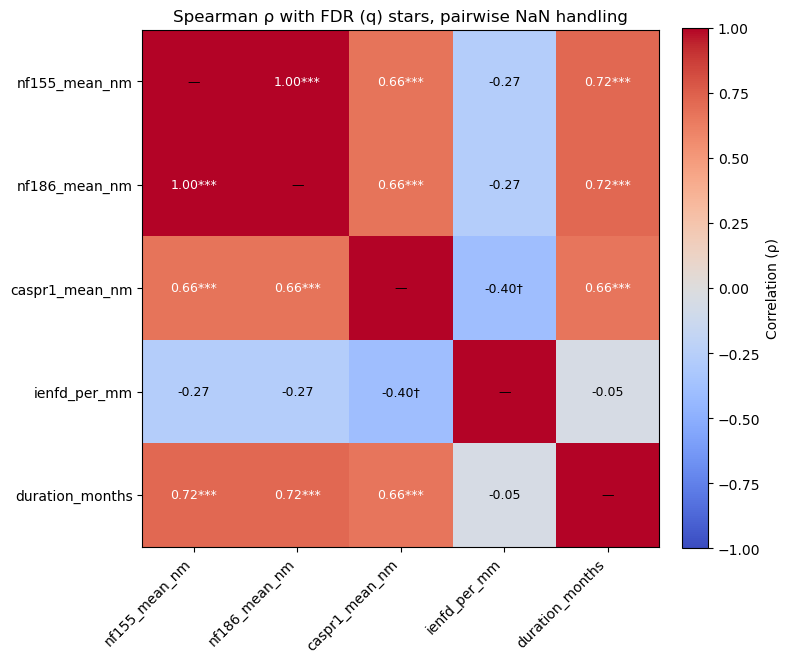

In [222]:
cols_for_corr = [
    "nf155_mean_nm","nf186_mean_nm","caspr1_mean_nm",
    "ienfd_per_mm","duration_months",
    "sas","nis_ll","npsi","hba1c_pct","snap_sural_nerve","age"
]
cols_for_corr = [c for c in cols_for_corr if c in df_use.columns]  # keep only present

R,P,Q,N = corr_with_signif(df_use, cols_for_corr, method="spearman", min_n=8, fdr_alpha=0.05)
display(R.round(2))
display(Q.round(3))
display(N)

plot_corr_heatmap(R, Q, N, title="Spearman ρ with FDR (q) stars, pairwise NaN handling", min_n=8)
